
# COGS 189: Depression

## Overview
In this project, we ______________.<br>

### EEG Data
For this dataset, we will be using data collected from James F. Cavanagh & John J.B.Allen's Depression Rest (d003) located at the following URL: http://predict.cs.unm.edu/downloads.php.
<br>
***
## Section 1: Setup
We will be importing the following packages: <br>
- numpy
- scipy
- matplotlib
- seaborn
- pandas

In [1]:
import numpy as np                                      # for dealing with data
from scipy.signal import butter, sosfiltfilt, sosfreqz  # for filtering
from scipy.io import loadmat                            # for importing matlab files
import matplotlib.pyplot as plt                         # for plotting
import seaborn as sns                                   # for visualization
import pandas as pd                                     # for importing datasets and handling data

Since each column in the EEG data corresponds to the columns in EEG times, we will use times_df as the column labels for data_df.

In [2]:
data_t = pd.read_csv('Data/545_data.csv')
channels = pd.read_csv('Data/545c.csv')
events = pd.read_csv('Data/545e.csv')
events['type'] = events['type'].astype(str)

In [3]:
data_t

,0,2,4,6,8,10,12,14,16,18,...,496808,496810,496812,496814,496816,496818,496820,496822,496824,496826
0,-19.99069,-19.07957,-16.66321,-14.47222,-14.17123,-14.46673,-14.83622,-16.20742,-18.72401,-21.41260,...,0,0,0,0,719.061,0.000000,0.000148,16.311060,-204640.900000,0.00000
1,-24.10534,-22.40571,-19.76858,-18.65047,-19.93701,-20.59192,-20.91723,-22.67482,-24.41329,-25.07132,...,0,0,0,0,719.061,0.010972,719.061000,0.000000,0.000148,16.31195
2,-20.99759,-18.57426,-16.62451,-18.46454,-23.22668,-24.62532,-22.78321,-21.77734,-22.25211,-22.79774,...,0,0,0,0,0.000,0.010972,719.061000,0.010972,719.061000,0.00000


In [4]:
eyes_closed = ['1', '3', '5']
eyes_open = ['2', '4', '6']
fs = 500
epoch_s = 0
epoch_e = 500

In [5]:
#Get relevent data from events
#TAs code

#eyes closed
dataset_closed_0 = []
dataset_closed_1 = []
dataset_closed_2 = []

for e in range(1, len(events)):
    if events['type'][e] in eyes_closed:
        time = int(events['latency'][e])
        if time % 2 == 1:
            time = time + 1
        
        time_end = time + 250
        loc_1 = data_t.columns.get_loc(str(time))
        loc_2 = data_t.columns.get_loc(str(time_end))
        dataset_closed_0.append(data_t.iloc[0, loc_1:loc_2])
        dataset_closed_1.append(data_t.iloc[1, loc_1:loc_2])
        dataset_closed_2.append(data_t.iloc[2, loc_1:loc_2])

#eyes open
dataset_open_0 = []
dataset_open_1 = []
dataset_open_2 = []

for e in range(1, len(events)):
    if events['type'][e] in eyes_open:
        time = int(events['latency'][e])
        if time % 2 == 1:
            time = time + 1
        
        time_end = time + 250
        loc_1 = data_t.columns.get_loc(str(time))
        loc_2 = data_t.columns.get_loc(str(time_end))
        dataset_open_0.append(data_t.iloc[0, loc_1:loc_2])
        dataset_open_1.append(data_t.iloc[1, loc_1:loc_2])
        dataset_open_2.append(data_t.iloc[2, loc_1:loc_2])

In [6]:
#Convert to df

closed_0 = pd.DataFrame(np.array(dataset_closed_0))
closed_1 = pd.DataFrame(np.array(dataset_closed_1))
closed_2 = pd.DataFrame(np.array(dataset_closed_2))

open_0 = pd.DataFrame(np.array(dataset_open_0))
open_1 = pd.DataFrame(np.array(dataset_open_1))
open_2 = pd.DataFrame(np.array(dataset_open_2))

In [7]:
#get the mean for the events
closed0 = closed_0.mean()
closed1 = closed_1.mean()
closed2 = closed_2.mean()

open0 = open_0.mean()
open1 = open_1.mean()
open2 = open_2.mean()

In [8]:
#combine O1, Oz, O2
closed_data = pd.DataFrame(np.array([closed0, closed1, closed2]))
open_data = pd.DataFrame(np.array([open0, open1, open2]))

In [14]:
closed_data

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-22.052137,-22.139677,-22.130472,-22.097818,-22.117542,-22.042953,-21.874229,-21.769963,-21.709879,-21.535761,...,-21.175941,-21.044266,-21.049515,-21.198665,-21.168431,-20.974360,-21.023839,-21.262979,-21.326253,-21.289837
1,-26.175717,-26.346633,-26.438613,-26.455992,-26.506910,-26.481464,-26.353779,-26.295125,-26.327454,-26.267831,...,-25.721127,-25.576697,-25.588439,-25.750252,-25.717253,-25.523457,-25.592991,-25.812224,-25.824509,-25.751596
2,-19.473896,-19.641282,-19.810246,-19.897637,-19.997253,-20.046274,-19.949805,-19.814695,-19.807334,-19.839169,...,-19.565456,-19.422932,-19.353775,-19.424379,-19.297203,-19.121655,-19.277391,-19.485304,-19.437405,-19.299967


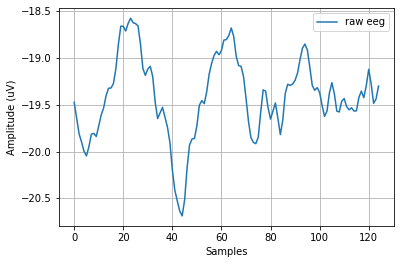

In [26]:
# Plot a random 300-sample chunk of data
plt.plot(closed2, label = "raw eeg");
plt.xlabel('Samples');
plt.ylabel('Amplitude (uV)');
plt.grid(True);
plt.legend(loc = 'best');

In [15]:
data = closed_data.mean()

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)


# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the max of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.min(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass

data = open_data.mean()

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)


# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the max of the fft amplitude for each EEG band
eeg_band_fft_open = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft_open[band] = np.min(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass



In [16]:
eeg_band_fft

{'Delta': 4.352644180597059,
 'Theta': 4.352644180597059,
 'Alpha': 7.2505439847075355,
 'Beta': 1.4081218713127348,
 'Gamma': 0.22978552444990671}

In [17]:
eeg_band_fft_open

{'Delta': 27.130400839083627,
 'Theta': 17.574112251375208,
 'Alpha': 17.574112251375208,
 'Beta': 3.062656820289721,
 'Gamma': 2.1246534554807455}

Text(0, 0.5, 'Mean band Amplitude')

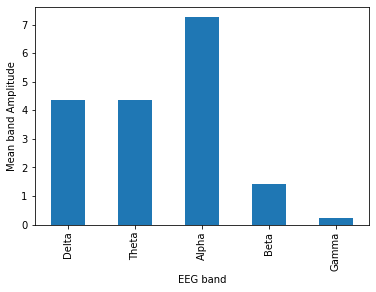

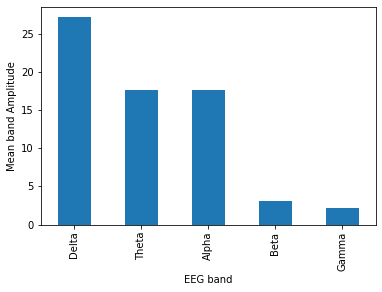

In [18]:
# Plot the data 
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")

df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft_open[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")